# <center> Passive Infrared Sensing of Dexras1 knockout and C57 Wild-type Mice

# <center> Converting 10-second bins into activity bout data
### <center> By Osama Abdalla </center>

In [1]:
#Loading appropriate packages:
library(tidyverse)
library(lubridate) #for handling dates
library(ez) #for split-plot ANOVA calculations
library(plotrix) #for plotting standard errors
library(rstatix) #for piping into statistical tests

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.0.5     v dplyr   1.0.7
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"package 'purrr' was built under R version 4.1.3"
Warning message:
"package 'forcats' was built under R version 4.1.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Warning message:
"package 'ez' was built under R version 4.1.3"
Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influen

The data are attached as a csv file called 20220530.csv
Let's attach this, call it Tickling_raw, and take a look at the data

In [2]:
Tickling_raw <- read.csv("20220530.csv", header=TRUE)
head(Tickling_raw)

,Time,ID,PIR1,PIR2,PIR3,PIR4,PIR5,PIR6,LDR
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2022-05-30T20:02:19,COMPASS_Can1,68,83,79,65,61,65,2999
2,2022-05-30T20:02:29,COMPASS_Can1,77,44,68,82,71,89,2985
3,2022-05-30T20:02:39,COMPASS_Can1,79,51,87,71,78,81,2997
4,2022-05-30T20:02:49,COMPASS_Can1,80,48,79,74,73,87,2975
5,2022-05-30T20:02:59,COMPASS_Can1,53,39,61,66,56,90,2980
6,2022-05-30T20:04:02,COMPASS_Can1,59,79,58,41,59,67,2934


PIR sensors are recording activity data every 10 seconds, with values between 0 (no activity) to 100 (full activity) during a 10 second interval. Each animal is hooked onto a single PIR. PIR1,3,5 are recording data for wild-type C57 mice. PIR2,4,6 are recording data for Dexras1 knockout mice. Six animals were thus recorded at the same time. The 'Time' column is inaccurate because the PIR sensor was developed in Greenwich Mean Time, but was used in Eastern Standard Time, which is 4 hours ahead. Lights in the cabinet are turned on at 9AM EST and off at 9PM. The PIR sensors are connected to an Arduino board that is not connected to a computer. This results in a lag in time of about 100 seconds every 2 weeks. To determine 'real-time' the LDR column can be used, which indicates when lights are on (>0) or off (0). Thus, for the first six animals, we will re-define the time column to account for the time zone difference (14400 seconds) and lag (1139 seconds) in a new dataframe defined as Tickling, as follows: 

In [3]:
Tickling <- Tickling_raw %>% mutate(Time=(ymd_hms(.$Time)-dseconds(15309)), 
                                LightDark=ifelse(Tickling_raw$LDR>0,"L", "D"),
                                start_hour=format(as.POSIXct(ymd_hms(.$Time)-dseconds(15309)), format="%Y-%m-%d %H:00:00"))%>%
                        
  select(-c("ID","LDR"))
head(Tickling)

,Time,PIR1,PIR2,PIR3,PIR4,PIR5,PIR6,LightDark,start_hour
,<dttm>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,2022-05-30 15:47:10,68,83,79,65,61,65,L,2022-05-30 15:00:00
2,2022-05-30 15:47:20,77,44,68,82,71,89,L,2022-05-30 15:00:00
3,2022-05-30 15:47:30,79,51,87,71,78,81,L,2022-05-30 15:00:00
4,2022-05-30 15:47:40,80,48,79,74,73,87,L,2022-05-30 15:00:00
5,2022-05-30 15:47:50,53,39,61,66,56,90,L,2022-05-30 15:00:00
6,2022-05-30 15:48:53,59,79,58,41,59,67,L,2022-05-30 15:00:00


Six animals were recorded at the same time, and these made up one cohort. Animals were placed in cabinets and baseline recorded for 7 days (June 18 9AM to June 25 2022 9AM). Animals were then sleep deprived for 6 hours, and placed back in cabinets for recording until June 29 3PM. There were a total of six cohorts, with all these data in the same 20220530.csv file. For convenience, we will relativize the dates of the remaining five cohorts to the first cohort, by subtracting days, such that baseline recordings begin on June 18 9AM for all these animals, and define these into dataframes Tickling1 through 5. The time the PIR is ahead of real-time can be found in the Mouse_Information.csv file.

In [4]:
Tickling1 <- Tickling_raw %>% mutate(Time=(ymd_hms(.$Time)-dseconds(15398)-ddays(13)), 
                                LightDark=ifelse(Tickling_raw$LDR>0,"L", "D"),
                                start_hour=format(as.POSIXct(ymd_hms(.$Time)-dseconds(15398)-ddays(13)), format="%Y-%m-%d %H:00:00"))%>%
  
  select(-c("ID","LDR"))

Tickling2 <- Tickling_raw %>% mutate(Time=(ymd_hms(.$Time)-dseconds(15508)-ddays(27)), 
                                     LightDark=ifelse(Tickling_raw$LDR>0,"L", "D"),
                                     start_hour=format(as.POSIXct(ymd_hms(.$Time)-dseconds(15508)-ddays(27)), format="%Y-%m-%d %H:00:00"))%>%
  
  select(-c("ID","LDR"))

Tickling3 <- Tickling_raw %>% mutate(Time=(ymd_hms(.$Time)-dseconds(15601)-ddays(40)), 
                                     LightDark=ifelse(Tickling_raw$LDR>0,"L", "D"),
                                     start_hour=format(as.POSIXct(ymd_hms(.$Time)-dseconds(15601)-ddays(40)), format="%Y-%m-%d %H:00:00"))%>%
  
  select(-c("ID","LDR"))

Tickling4 <- Tickling_raw %>% mutate(Time=(ymd_hms(.$Time)-dseconds(15700)-ddays(53)), 
                                     LightDark=ifelse(Tickling_raw$LDR>0,"L", "D"),
                                     start_hour=format(as.POSIXct(ymd_hms(.$Time)-dseconds(15700)-ddays(53)), format="%Y-%m-%d %H:00:00"))%>%
  
  select(-c("ID","LDR"))

Tickling5 <- Tickling_raw %>% mutate(Time=(ymd_hms(.$Time)-dseconds(15798)-ddays(67)), 
                                     LightDark=ifelse(Tickling_raw$LDR>0,"L", "D"),
                                     start_hour=format(as.POSIXct(ymd_hms(.$Time)-dseconds(15798)-ddays(67)), format="%Y-%m-%d %H:00:00"))%>%
  
  select(-c("ID","LDR"))


The PIR sensors give an indication of whether the animal is active. One question that can be asked is, is there a difference in the distribution of activity bouts between Dexras1 KO and C57 wild-type mice. To answer this question, we can define a rolling function to indicate whether the animal is in an activity bout, as follows:

In [5]:
activity_bout <- function(PIR){
    PIRroll <- ifelse(PIR==0, 0,1)
    PIRnum <- numeric(length(PIRroll))
    for (i in 1:length(PIRroll)){
      PIRnum[i] <- ifelse(PIRroll[i]==0, 0, PIRnum[i-1]+1)
    }
    PIRnum
  }

The length of the bout increases as long as the animal continues to be active:

In [6]:
head(cbind(PIR1=Tickling$PIR1,Activity_Bout=activity_bout(Tickling$PIR1)),38)

PIR1,Activity_Bout
68,NA
77,NA
79,NA
80,NA
53,NA
59,NA
83,NA
64,NA
71,NA
56,NA


We can determine how long the bout lasted by defining a function that extracts a non-zero number that is followed by a 0:

In [7]:
activity_bout_duration <- function (Data, PIR){
    sleep_bout_duration <- activity_bout(PIR)
    PIRMax <- numeric(length(sleep_bout_duration))
    for (i in 1:length(sleep_bout_duration)){
      PIRMax[i] <- ifelse(!sleep_bout_duration[i]==0 & 
                            sleep_bout_duration[i+1]==0, sleep_bout_duration[i],0)
    }
    

    PIRMax <- PIRMax[! PIRMax %in% c(0, NA)]
    
    PIRMax
  }

Thus, for PIR1, the first activity_bout is 11, followed by 1 followed by 3:

In [8]:
head(activity_bout_duration(Tickling,Tickling$PIR1),15)

[1] 11  1  3  2  8  1  9  6  6  1  4 15 27  7  2

We will redefine activity_bout_duration to only include the 7 baseline dates that are relavent to this study (June 18 to June 25):

In [9]:
activity_bout_duration <- function (Data, PIR){
    sleep_bout_duration <- activity_bout(PIR)
    PIRMax <- numeric(length(sleep_bout_duration))
    for (i in 1:length(sleep_bout_duration)){
      PIRMax[i] <- ifelse(!sleep_bout_duration[i]==0 & 
                            sleep_bout_duration[i+1]==0, sleep_bout_duration[i],0)
    }
    
    PIRMax <- PIRMax[ymd_hms(Data[,length(Data)])>=ymd_hms("2022-06-18T09:00:00") & 
             ymd_hms(Data[,length(Data)])<ymd_hms("2022-06-25T09:00:00")]
    PIRMax <- PIRMax[! PIRMax %in% c(0, NA)]
    
    PIRMax
  }

In [10]:
head(activity_bout_duration(Tickling,Tickling$PIR1),15)

[1] 57  6  4 50  3 25 51  3  1  4 17 12 24  1 14

After filtering, the first bout lasts for 57 10-second intervals, followed by 6, followed by 4.

We will divide these bouts by 6 for time in minutes the bout lasted. We will define a function to count how many bouts were less than a minute, between 1 and 10 minutes, between 10 and 60 minutes, and above 60 minutes, and we will average this over the 7 days using the function Activity_Bout_Distribution:

In [11]:
Activity_Bout_Distribution <- function(Data,PIR){
    PIR <- activity_bout_duration(Data,PIR)
    Dist<-summary(cut(PIR/6, 
                      breaks=c(0,1,10,60,Inf), 
                      include.lowest=TRUE, 
                      right=FALSE, 
                      labels=c("<1","1-10", "10-60",">60")))/7
    Dist
  }

In [12]:
Activity_Bout_Distribution(Tickling, Tickling$PIR1)

<1      1-10     10-60       >60 
119.00000 103.85714  10.42857   0.00000

So, for PIR1, there were 119 bouts that lasted less than 1 minutes, 103.8 bouts that lasted between 1 and 10 minutes, 10.4 bouts that lasted 10 to 60 minutes, and 0 bouts that lasted greater than 60 minutes. We can run this code for all 36 mice, and place them in a dataframe:

In [13]:
Activity_Distribution <- as.data.frame(cbind(Bout_Length_min=c("<1","1-10","10-60",">60"),
        C57_Male_1=Activity_Bout_Distribution(Tickling, Tickling$PIR1),
        Dexras1KO_Male_1=Activity_Bout_Distribution(Tickling, Tickling$PIR2),
        C57_Male_2=Activity_Bout_Distribution(Tickling, Tickling$PIR3),
        Dexras1KO_Male_2=Activity_Bout_Distribution(Tickling, Tickling$PIR4),
        C57_Male_3=Activity_Bout_Distribution(Tickling, Tickling$PIR5),
        Dexras1KO_Male_3=Activity_Bout_Distribution(Tickling, Tickling$PIR6),
        C57_Male_4=Activity_Bout_Distribution(Tickling1, Tickling1$PIR1),
        Dexras1KO_Male_4=Activity_Bout_Distribution(Tickling1, Tickling1$PIR2),
        C57_Male_5=Activity_Bout_Distribution(Tickling1, Tickling1$PIR3),
        Dexras1KO_Male_5=Activity_Bout_Distribution(Tickling1, Tickling1$PIR4),
        C57_Male_6=Activity_Bout_Distribution(Tickling1, Tickling1$PIR5),
        Dexras1KO_Male_6=Activity_Bout_Distribution(Tickling1, Tickling1$PIR6),
        C57_Female_1=Activity_Bout_Distribution(Tickling2, Tickling2$PIR1),
        Dexras1KO_Female_1=Activity_Bout_Distribution(Tickling2, Tickling2$PIR2),
        C57_Female_2=Activity_Bout_Distribution(Tickling2, Tickling2$PIR3),
        Dexras1KO_Female_2=Activity_Bout_Distribution(Tickling2, Tickling2$PIR4),
        C57_Female_3=Activity_Bout_Distribution(Tickling2, Tickling2$PIR5),
        Dexras1KO_Female_3=Activity_Bout_Distribution(Tickling2, Tickling2$PIR6),
        C57_Female_4=Activity_Bout_Distribution(Tickling3, Tickling3$PIR1),
        Dexras1KO_Female_4=Activity_Bout_Distribution(Tickling3, Tickling3$PIR2),
        C57_Female_5=Activity_Bout_Distribution(Tickling3, Tickling3$PIR3),
        Dexras1KO_Female_5=Activity_Bout_Distribution(Tickling3, Tickling3$PIR4),
        C57_Female_6=Activity_Bout_Distribution(Tickling3, Tickling3$PIR5),
        Dexras1KO_Female_6=Activity_Bout_Distribution(Tickling3, Tickling3$PIR6),
        C57_Male_7=Activity_Bout_Distribution(Tickling4, Tickling4$PIR1),
        Dexras1KO_Male_7=Activity_Bout_Distribution(Tickling4, Tickling4$PIR2),
        C57_Male_8=Activity_Bout_Distribution(Tickling4, Tickling4$PIR3),
        Dexras1KO_Male_8=Activity_Bout_Distribution(Tickling4, Tickling4$PIR4),
        C57_Male_9=Activity_Bout_Distribution(Tickling4, Tickling4$PIR5),
        Dexras1KO_Male_9=Activity_Bout_Distribution(Tickling4, Tickling4$PIR6),
        C57_Female_7=Activity_Bout_Distribution(Tickling5, Tickling5$PIR1),
        Dexras1KO_Female_7=Activity_Bout_Distribution(Tickling5, Tickling5$PIR2),
        C57_Female_8=Activity_Bout_Distribution(Tickling5, Tickling5$PIR3),
        Dexras1KO_Female_8=Activity_Bout_Distribution(Tickling5, Tickling5$PIR4),
        C57_Female_9=Activity_Bout_Distribution(Tickling5, Tickling5$PIR5),
        Dexras1KO_Female_9=Activity_Bout_Distribution(Tickling5, Tickling5$PIR6)))%>%
    pivot_longer(cols=c(2:37), names_to="Animal", values_to="No_of_Activity_Bouts")%>%
    mutate(Animal_ID=Animal, No_of_Activity_Bouts=as.numeric(No_of_Activity_Bouts), 
           Bout_Length_min=fct_relevel(Bout_Length_min, c("<1","1-10", "10-60",">60")))%>%
    separate(col="Animal", into=c("Animal_Type", "Sex", "Number"), sep = "_")
head(Activity_Distribution)

Bout_Length_min,Animal_Type,Sex,Number,No_of_Activity_Bouts,Animal_ID
<fct>,<chr>,<chr>,<chr>,<dbl>,<chr>
<1,C57,Male,1,119.0000,C57_Male_1
<1,Dexras1KO,Male,1,259.0000,Dexras1KO_Male_1
<1,C57,Male,2,210.5714,C57_Male_2
<1,Dexras1KO,Male,2,273.1429,Dexras1KO_Male_2
<1,C57,Male,3,289.0000,C57_Male_3
<1,Dexras1KO,Male,3,266.2857,Dexras1KO_Male_3


## <center> Activity Bout Distributions Bar Graphs

We will produce a graphing function to make plotting the activity bout distributions easier for males, females and both sexes together:

In [14]:
Activity_Distribution_Figure <- function(Data, label1){
  Data%>%
    group_by(Animal_Type, Bout_Length_min)%>%
    summarise(mean=mean(No_of_Activity_Bouts),
              sd=std.error(No_of_Activity_Bouts))%>%
    ggplot(aes(x=Bout_Length_min, y=mean, fill=Animal_Type))+
    geom_bar(stat="identity",position = position_dodge(width=.9), alpha = 0.75, color="black")+
    geom_errorbar(aes(ymax=mean+sd, ymin=mean-sd, color=Animal_Type), width=.3,position = position_dodge(width=.9), alpha = 0.75, color="black")+
    scale_fill_manual(values=c("black", "red"), labels=label1)+
    scale_y_continuous(breaks=c(0, 50,100,150,200,250,300),expand=expansion(mult=c(0,0.01)),limits=c(0,300))+
    labs(x="Bout Length (min)", y="No. of Activity Bouts")+
    theme_bw()+
    theme(legend.text=element_text(size=13),axis.text=element_text(size=26, color="black", face="bold"),
          axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5),
          axis.title.y=element_text(vjust=+1.8),
          axis.title=element_text(size=26, face="bold"),
          axis.ticks= element_line(size=1),
          axis.line = element_line(size=1),
          axis.title.x=element_text(vjust=-0.5),
          panel.border = element_blank(),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          legend.title=element_blank())
  }

Warning message:
"Converting "Animal_ID" to factor for ANOVA."
Warning message:
"Converting "Animal_Type" to factor for ANOVA."


$ANOVA
                       Effect DFn DFd          F            p p<.05        ges
2                 Animal_Type   1  34   6.333072 1.673429e-02     * 0.04774291
3             Bout_Length_min   3 102 307.121180 6.518636e-51     * 0.86844895
4 Animal_Type:Bout_Length_min   3 102   4.534374 5.016510e-03     * 0.08881086

$`Mauchly's Test for Sphericity`
                       Effect            W            p p<.05
3             Bout_Length_min 0.0009572597 6.202873e-47     *
4 Animal_Type:Bout_Length_min 0.0009572597 6.202873e-47     *

$`Sphericity Corrections`
                       Effect       GGe        p[GG] p[GG]<.05       HFe
3             Bout_Length_min 0.3728242 1.620529e-20         * 0.3765695
4 Animal_Type:Bout_Length_min 0.3728242 3.583251e-02         * 0.3765695
         p[HF] p[HF]<.05
3 1.065584e-20         *
4 3.541346e-02         *

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()



,Bout_Length_min,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,<1,Animal_Type,1,34,4.977,0.032,*,0.128,0.04533333
2,1-10,Animal_Type,1,34,5.719,0.022,*,0.144,0.04533333
3,10-60,Animal_Type,1,34,3.745,0.061,,0.099,0.06100000
4,>60,Animal_Type,1,34,4.857,0.034,*,0.125,0.04533333


`summarise()` has grouped output by 'Animal_Type'. You can override using the `.groups` argument.


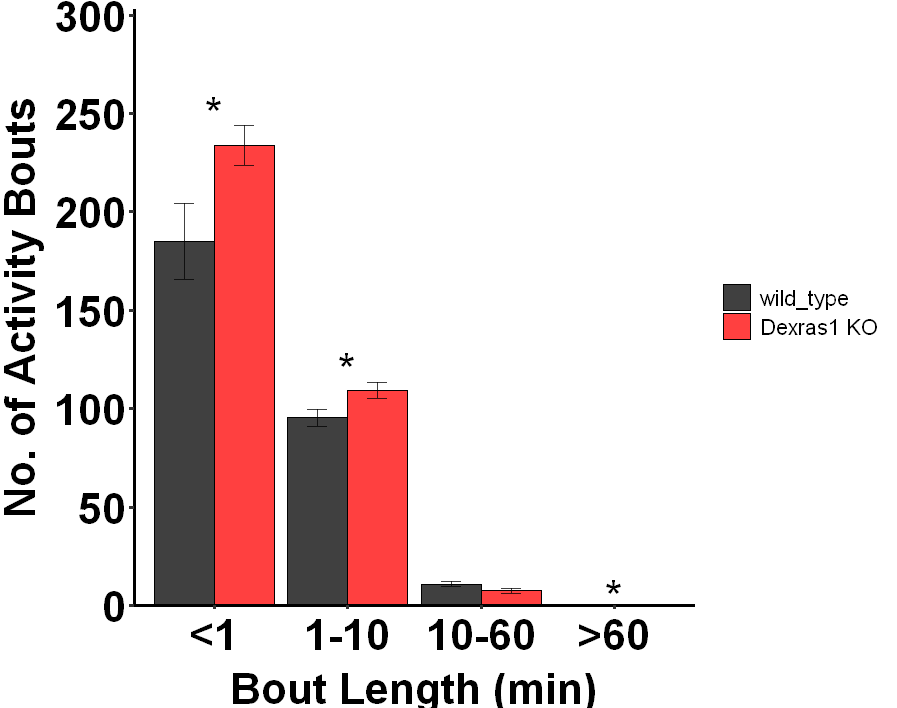

In [15]:
#Split-Plot ANOVA - Activity Bout Distribution - Both Sexes
ezANOVA(Activity_Distribution, dv=.(No_of_Activity_Bouts), wid=.(Animal_ID), within=.(Bout_Length_min), between=.(Animal_Type))
#Post-hoc tests  - Activity Bout Distribution - Both Sexes
p_adjust_activity_bout <- Activity_Distribution%>%group_by(Bout_Length_min)%>%
    anova_test(dv = No_of_Activity_Bouts, wid = Animal_ID, between = Animal_Type) %>%
    get_anova_table() %>%
    adjust_pvalue(method = "BH")
p_adjust_activity_bout
#Plotting Activity Bout Distribution - Both Sexes
options(repr.plot.width=19/2.54, repr.plot.height=15/2.54)
Activity_Distribution_Figure(Activity_Distribution, c("wild_type", "Dexras1 KO"))+
    annotate("text",x="<1", y=250, label="*", angle=0, size=10)+
    annotate("text",x="1-10", y=120, label="*", angle=0, size=10)+
    annotate("text",x=">60", y=5, label="*", angle=0, size=10)
  ggsave("Plots/Activity_Bout_Distribution.png",width=19, height=15,units = "cm")

Warning message:
"Converting "Animal_ID" to factor for ANOVA."
Warning message:
"Converting "Animal_Type" to factor for ANOVA."


$ANOVA
                       Effect DFn DFd          F            p p<.05        ges
2                 Animal_Type   1  16   1.708022 2.097148e-01       0.02284572
3             Bout_Length_min   3  48 254.557244 1.824826e-29     * 0.92551422
4 Animal_Type:Bout_Length_min   3  48   1.479759 2.318666e-01       0.06736395

$`Mauchly's Test for Sphericity`
                       Effect           W            p p<.05
3             Bout_Length_min 0.000264989 3.312257e-24     *
4 Animal_Type:Bout_Length_min 0.000264989 3.312257e-24     *

$`Sphericity Corrections`
                       Effect       GGe        p[GG] p[GG]<.05      HFe
3             Bout_Length_min 0.3521371 9.177360e-12         * 0.355983
4 Animal_Type:Bout_Length_min 0.3521371 2.424473e-01           0.355983
         p[HF] p[HF]<.05
3 7.194766e-12         *
4 2.426270e-01

`summarise()` has grouped output by 'Animal_Type'. You can override using the `.groups` argument.


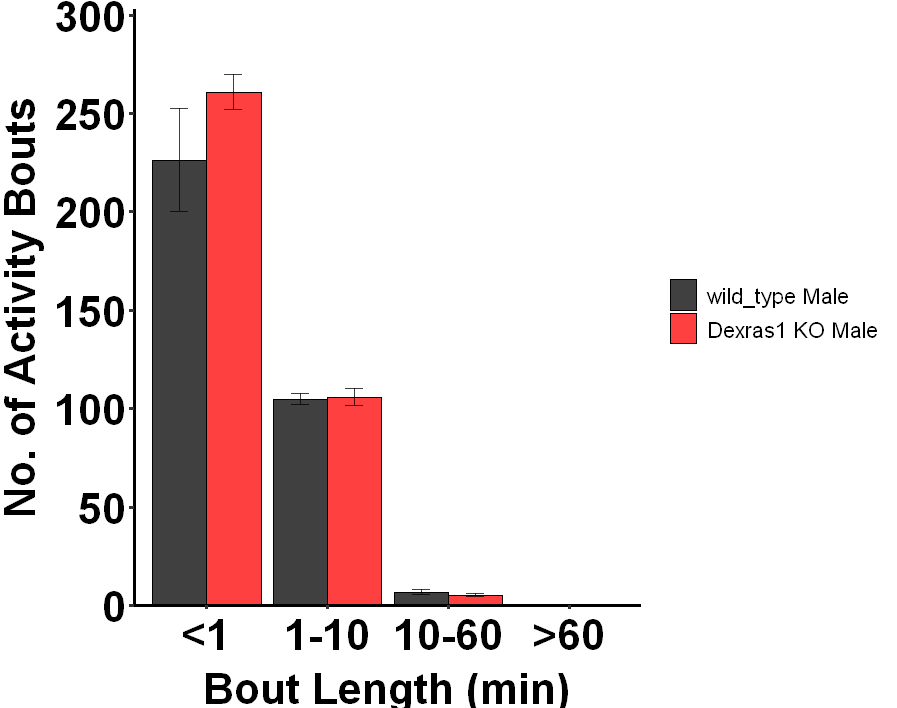

In [16]:
#Split-Plot ANOVA - Activity Bout Distribution - Males 
ezANOVA(Activity_Distribution %>% filter(Sex=="Male"), dv=.(No_of_Activity_Bouts), wid=.(Animal_ID), within=.(Bout_Length_min), between=.(Animal_Type))
#Plotting Activity Bout Distribution - Males
options(repr.plot.width=19/2.54, repr.plot.height=15/2.54)
Activity_Distribution_Figure(Activity_Distribution%>% filter(Sex=="Male"), c("wild_type Male", "Dexras1 KO Male"))
  ggsave("Plots/Activity_Bout_Distribution_M.png",width=19, height=15,units = "cm")

Warning message:
"Converting "Animal_ID" to factor for ANOVA."
Warning message:
"Converting "Animal_Type" to factor for ANOVA."


$ANOVA
                       Effect DFn DFd          F            p p<.05       ges
2                 Animal_Type   1  16   7.065404 1.718343e-02     * 0.1281664
3             Bout_Length_min   3  48 161.840485 4.244071e-25     * 0.8709288
4 Animal_Type:Bout_Length_min   3  48   5.825182 1.772139e-03     * 0.1954112

$`Mauchly's Test for Sphericity`
                       Effect           W            p p<.05
3             Bout_Length_min 0.001163065 1.117468e-19     *
4 Animal_Type:Bout_Length_min 0.001163065 1.117468e-19     *

$`Sphericity Corrections`
                       Effect       GGe        p[GG] p[GG]<.05       HFe
3             Bout_Length_min 0.3720161 1.120018e-10         * 0.3801146
4 Animal_Type:Bout_Length_min 0.3720161 2.391364e-02         * 0.3801146
         p[HF] p[HF]<.05
3 7.279083e-11         *
4 2.311064e-02         *

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()



,Bout_Length_min,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,<1,Animal_Type,1,16,6.037,0.026,*,0.274,0.041
2,1-10,Animal_Type,1,16,7.728,0.013,*,0.326,0.041
3,10-60,Animal_Type,1,16,4.962,0.041,*,0.237,0.041
4,>60,Animal_Type,1,16,4.990,0.040,*,0.238,0.041


`summarise()` has grouped output by 'Animal_Type'. You can override using the `.groups` argument.


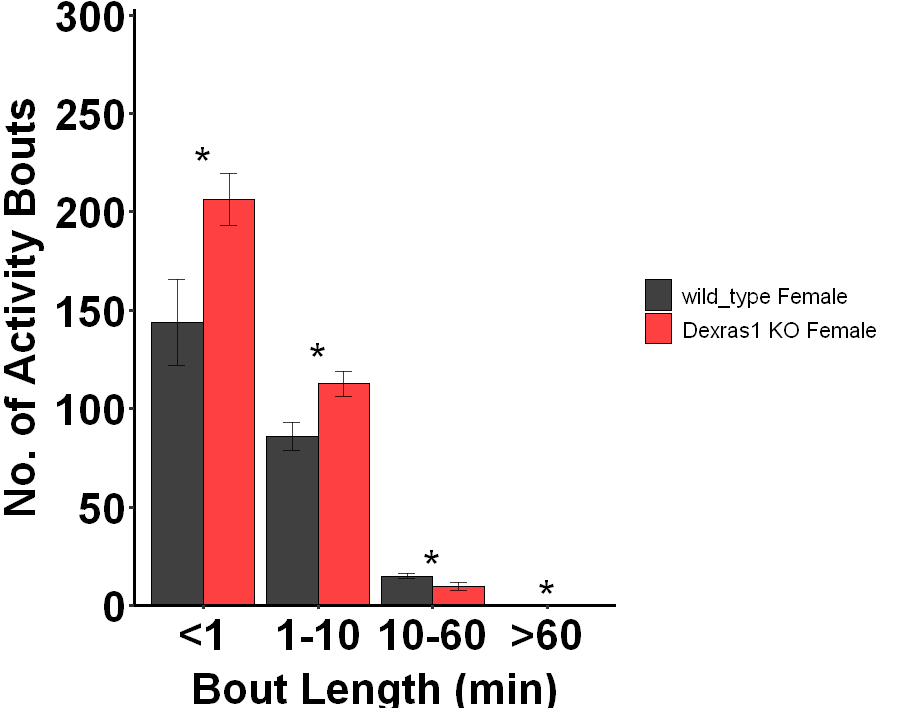

In [17]:
#Split-Plot ANOVA - Activity Bout Distribution - Females 
ezANOVA(Activity_Distribution %>% filter(Sex=="Female"), dv=.(No_of_Activity_Bouts), wid=.(Animal_ID), within=.(Bout_Length_min), between=.(Animal_Type))
#Post-hoc tests  - Activity Bout Distribution - Females
p_adjust_activity_bout_Female <- Activity_Distribution%>%filter(Sex=="Female")%>%group_by(Bout_Length_min)%>%
    anova_test(dv = No_of_Activity_Bouts, wid = Animal_ID, between = Animal_Type) %>%
    get_anova_table() %>%
    adjust_pvalue(method = "BH")
p_adjust_activity_bout_Female
#Plotting Activity Bout Distribution - Females 
options(repr.plot.width=19/2.54, repr.plot.height=15/2.54)
Activity_Distribution_Figure(Activity_Distribution%>% filter(Sex=="Female"), c("wild_type Female", "Dexras1 KO Female"))+
    annotate("text",x="<1", y=225, label="*", angle=0, size=10)+
    annotate("text",x="1-10", y=125, label="*", angle=0, size=10)+
    annotate("text",x="10-60", y=20, label="*", angle=0, size=10)+
    annotate("text",x=">60", y=5, label="*", angle=0, size=10)
  ggsave("Plots/Activity_Bout_Distribution_F.png",width=19, height=15,units = "cm")

# <center> Calculating Baseline Intraday Variability and Interdaily Stability

We can get other measures of activity by calculating intraday variability and interdaily stability.
 - Interdaily stability is a measure of how much the animal's activity varies between days.
 - Intraday variability is a measure of how much the animal's activity varies within the day
 
The raw PIR values represent the activity of the animal during a 10-second interval. Recall there were six mice per cohort (each having a PIR), with a total of six cohorts. The Tickling files all contain the same information, except their dates are relativized to the first cohort. We will resample the filtered PIR data into one-minute bins to have a high resolution, and add these into a data-frame called Activity_Intra_Inter for all 36 animals:

In [18]:
Activity_Intra_Inter <- cbind(Tickling%>%
                                  filter(ymd_hms(start_hour)>=ymd_hms("2022-06-18T09:00:00") & 
                                           ymd_hms(start_hour)<ymd_hms("2022-06-25T09:00:00"))%>% #filter for baseline data only
                                  group_by(start_hour=floor_date(Time, "minute"))%>%summarize_at(2:7, mean)%>% #calculate means from 10-second intervals that fall within a given minute
                                  ungroup()%>%transmute(start_hour, C57_Male_1=PIR1, 
                                            Dexras1KO_Male_1=PIR2,
                                            C57_Male_2=PIR3, 
                                            Dexras1KO_Male_2=PIR4,
                                            C57_Male_3=PIR5, 
                                            Dexras1KO_Male_3=PIR6), 
                                Tickling1%>% filter(ymd_hms(start_hour)>=ymd_hms("2022-06-18T09:00:00") & 
                                                      ymd_hms(start_hour)<ymd_hms("2022-06-25T09:00:00"))%>%
                                  group_by(start_hour=floor_date(Time, "minute"))%>%summarize_at(2:7, mean)%>%
                                  ungroup()%>%transmute(start_hour, C57_Male_4=PIR1, 
                                            Dexras1KO_Male_4=PIR2,
                                            C57_Male_5=PIR3, 
                                            Dexras1KO_Male_5=PIR4,
                                            C57_Male_6=PIR5, 
                                            Dexras1KO_Male_6=PIR6),
                                Tickling2%>% filter(ymd_hms(start_hour)>=ymd_hms("2022-06-18T09:00:00") & 
                                                      ymd_hms(start_hour)<ymd_hms("2022-06-25T09:00:00"))%>%
                                  group_by(start_hour=floor_date(Time, "minute"))%>%summarize_at(2:7, mean)%>%
                                  ungroup()%>%transmute(start_hour, C57_Female_1=PIR1, 
                                            Dexras1KO_Female_1=PIR2,
                                            C57_Female_2=PIR3, 
                                            Dexras1KO_Female_2=PIR4,
                                            C57_Female_3=PIR5, 
                                            Dexras1KO_Female_3=PIR6),
                                Tickling3%>% filter(ymd_hms(start_hour)>=ymd_hms("2022-06-18T09:00:00") & 
                                                      ymd_hms(start_hour)<ymd_hms("2022-06-25T09:00:00"))%>%
                                  group_by(start_hour=floor_date(Time, "minute"))%>%summarize_at(2:7, mean)%>%
                                  ungroup()%>%transmute(start_hour, C57_Female_4=PIR1, 
                                                        Dexras1KO_Female_4=PIR2,
                                                        C57_Female_5=PIR3, 
                                                        Dexras1KO_Female_5=PIR4,
                                                        C57_Female_6=PIR5, 
                                                        Dexras1KO_Female_6=PIR6),
                                Tickling4%>%
                                  filter(ymd_hms(start_hour)>=ymd_hms("2022-06-18T09:00:00") & 
                                           ymd_hms(start_hour)<ymd_hms("2022-06-25T09:00:00"))%>%
                                  group_by(start_hour=floor_date(Time, "minute"))%>%summarize_at(2:7, mean)%>%
                                  ungroup()%>%transmute(start_hour, C57_Male_7=PIR1, 
                                                        Dexras1KO_Male_7=PIR2,
                                                        C57_Male_8=PIR3, 
                                                        Dexras1KO_Male_8=PIR4,
                                                        C57_Male_9=PIR5, 
                                                        Dexras1KO_Male_9=PIR6),
                                Tickling5%>%
                                  filter(ymd_hms(start_hour)>=ymd_hms("2022-06-18T09:00:00") & 
                                           ymd_hms(start_hour)<ymd_hms("2022-06-25T09:00:00"))%>%
                                  group_by(start_hour=floor_date(Time, "minute"))%>%summarize_at(2:7, mean)%>%
                                  ungroup()%>%transmute(start_hour, C57_Female_7=PIR1, 
                                                        Dexras1KO_Female_7=PIR2,
                                                        C57_Female_8=PIR3, 
                                                        Dexras1KO_Female_8=PIR4,
                                                        C57_Female_9=PIR5, 
                                                        Dexras1KO_Female_9=PIR6))%>%
    pivot_longer(cols=c(2:37), names_to="Animal", values_to="Activity")%>% #pivot to longer format for plotting and statistics
    mutate(Animal_ID=Animal)%>%
    separate(col="Animal", into=c("Animal_Type", "Sex", "Number"), sep = "_")%>%
    ungroup()
head(Activity_Intra_Inter)

start_hour,Animal_Type,Sex,Number,Activity,Animal_ID
<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>
2022-06-18 09:00:00,C57,Male,1,63.33333,C57_Male_1
2022-06-18 09:00:00,Dexras1KO,Male,1,70.50000,Dexras1KO_Male_1
2022-06-18 09:00:00,C57,Male,2,61.16667,C57_Male_2
2022-06-18 09:00:00,Dexras1KO,Male,2,70.83333,Dexras1KO_Male_2
2022-06-18 09:00:00,C57,Male,3,75.50000,C57_Male_3
2022-06-18 09:00:00,Dexras1KO,Male,3,58.83333,Dexras1KO_Male_3


We will take each minute to be an individual data point. The calculations are modified from Someren et al (1996): van Someren EJ, Hagebeuk EE, Lijzenga C, Scheltens P, de Rooij SE, Jonker C, et al. Circadian rest–activity rhythm disturbances in Alzheimer’s disease. Biol Psychiatry. 1996;40:259–70.

Interdaily Stability = $\frac{n\sum_{m=1}^p(\bar{x_m}-\bar{x})^2}{p\sum_{i=1}^n(x_i-\bar{x})^2}$

Intraday Variability = $\frac{n\sum_{i=2}^n(x_i-x_{i-1})^2}{(n-1)\sum_{i=1}^n(x_i-\bar{x})^2}$

where $n$ is the total number of data, $p$ the number of data per day, $\bar{x_m}$ the means per minute over the 7 days, $\bar{x}$ the mean of all data, and $x_i$ the individual data points. 

We first calculate interdaily stability below:

## <center> Interdaily Stability Calculation and Figures

In [19]:
   Numerator_Inter <- Activity_Intra_Inter%>%group_by(Animal_ID)%>%mutate(grand_mean=mean(Activity))%>%#mean of all data per animal
     ungroup()%>%group_by(format(start_hour,format = "%H:%M:%S"), Animal_ID, Animal_Type, Sex)%>%#group by each minute over the 7 days
    summarize(to_sum=(mean(Activity)-grand_mean)^2)%>% #subtract means per minute over 7 days and mean of all data then square this
     ungroup()%>%distinct()%>% #leads to 24*60=1440 rows per animal, one for each minute of one day
    group_by(Animal_ID, Animal_Type, Sex)%>%summarize(numerator=(nrow(Activity_Intra_Inter)/36)*sum(to_sum)) #divide by 36 since total number of data is per animal
    
     Denominator_Inter <- Activity_Intra_Inter%>%group_by(Animal_ID)%>%mutate(grand_mean=mean(Activity))%>%#mean of all data per animal
     ungroup()%>%mutate(Denominator=(Activity-grand_mean)^2)%>%group_by(Animal_ID)%>%#individual data points subtract mean of all data 
     summarize(Denominator=((nrow(Activity_Intra_Inter)/36)/7)*sum(Denominator))#divide by 36/7 for the number of data per day per animal

Inter_Day_Stability <- left_join(Numerator_Inter, Denominator_Inter, by="Animal_ID")%>%
  mutate(interday_stability=numerator/Denominator) #Interdaily stability is the quotient of numerator and Denominator
head(Inter_Day_Stability)

`summarise()` has grouped output by 'format(start_hour, format = "%H:%M:%S")', 'Animal_ID', 'Animal_Type', 'Sex'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Animal_ID', 'Animal_Type'. You can override using the `.groups` argument.


Animal_ID,Animal_Type,Sex,numerator,Denominator,interday_stability
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
C57_Female_1,C57,Female,9370320750,15794244857,0.5932744
C57_Female_2,C57,Female,4171803934,9394500734,0.4440687
C57_Female_3,C57,Female,3513119412,7579086572,0.4635281
C57_Female_4,C57,Female,8167874250,12479584825,0.6544989
C57_Female_5,C57,Female,6083094267,10427386446,0.5833767
C57_Female_6,C57,Female,9109455806,14712740442,0.6191543


We plot these data using a graphing function to make plotting individual sexes easier:

In [20]:
Inter_Day_Stability_Figure <- function(Data, label1){
Data %>%group_by(Animal_Type)%>%
  summarize(mean=mean(interday_stability), sd=std.error(interday_stability))%>%
  ggplot(aes(x=Animal_Type, y=mean))+
  geom_boxplot(width=.5,position=position_dodge(.05), lwd=.25)+
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd, color=Animal_Type), width=.35)+
  geom_jitter(data=Data%>%
                group_by(Animal_Type), aes(x=Animal_Type, y=interday_stability, 
                                           color=Animal_Type, shape=Animal_Type), size=2.1, 
              position=position_jitter(w = 0.1, h = 0))+
  scale_y_continuous(breaks=c(0,.1,.2,.3,.4,.5,.6,.7),expand=expansion(mult=c(0,0.01)),limits = c(0,.7))+
  labs(x="",y="Interday Stability (IS)")+
  theme_bw()+
  theme(legend.text=element_text(size=13),axis.text=element_text(size=12, color="black", face="bold"),
        axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5),
        axis.title.y=element_text(vjust=+1.8),
        axis.title=element_text(size=13, face="bold"),
        axis.ticks= element_line(size=1, color="black"),
        axis.line = element_line(size=1),
        axis.title.x=element_text(vjust=-0.5),
        panel.border = element_blank(),
        panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        legend.title=element_blank(),
        legend.position="none")+
  scale_color_manual(values=c("black", "red"), labels=label1)+
  scale_shape_manual(values=c("square", "circle"), labels=label1)+
  scale_x_discrete(labels=label1)
}


	Two Sample t-test

data:  Inter_Day_Stability$interday_stability by Inter_Day_Stability$Animal_Type
t = 1.1228, df = 34, p-value = 0.2694
alternative hypothesis: true difference in means between group C57 and group Dexras1KO is not equal to 0
95 percent confidence interval:
 -0.02238391  0.07765654
sample estimates:
      mean in group C57 mean in group Dexras1KO 
              0.4902000               0.4625637 


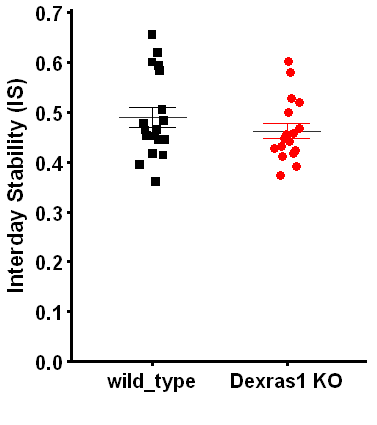

In [21]:
#t-test Interdaily Stability - Both Sexes
t.test(Inter_Day_Stability$interday_stability~Inter_Day_Stability$Animal_Type, var.equal=TRUE)
#Plot Interdaily Stability - Both Sexes
options(repr.plot.width=8/2.54, repr.plot.height=9/2.54)
Inter_Day_Stability_Figure(Inter_Day_Stability,c("wild_type","Dexras1 KO") )
ggsave("Plots/InterDayStability_Plot.png",width=8, height=9,units = "cm")


	Two Sample t-test

data:  Inter_Day_Stability$interday_stability[Inter_Day_Stability$Sex == "Male"] by Inter_Day_Stability$Animal_Type[Inter_Day_Stability$Sex == "Male"]
t = 0.0013687, df = 16, p-value = 0.9989
alternative hypothesis: true difference in means between group C57 and group Dexras1KO is not equal to 0
95 percent confidence interval:
 -0.03540790  0.03545365
sample estimates:
      mean in group C57 mean in group Dexras1KO 
              0.4314339               0.4314110 


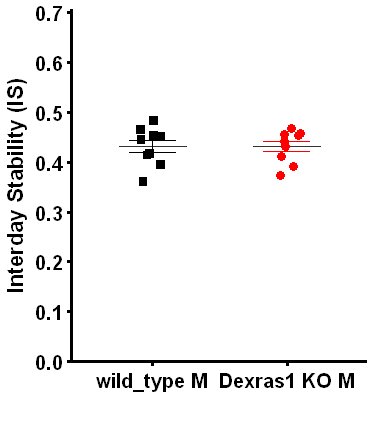

In [22]:
#t-test Interday Stability - Males
t.test(Inter_Day_Stability$interday_stability[Inter_Day_Stability$Sex=="Male"]~Inter_Day_Stability$Animal_Type[Inter_Day_Stability$Sex=="Male"], var.equal=TRUE)
#Plot Interday Stability - Males
options(repr.plot.width=8/2.54, repr.plot.height=9/2.54)
Inter_Day_Stability_Figure(Inter_Day_Stability%>%filter(Sex=="Male"),c("wild_type M","Dexras1 KO M") )
ggsave("Plots/InterDayStability_Plot_M.png",width=8, height=9,units = "cm")



	Two Sample t-test

data:  Inter_Day_Stability$interday_stability[Inter_Day_Stability$Sex == "Female"] by Inter_Day_Stability$Animal_Type[Inter_Day_Stability$Sex == "Female"]
t = 1.602, df = 16, p-value = 0.1287
alternative hypothesis: true difference in means between group C57 and group Dexras1KO is not equal to 0
95 percent confidence interval:
 -0.01786051  0.12836002
sample estimates:
      mean in group C57 mean in group Dexras1KO 
              0.5489660               0.4937163 


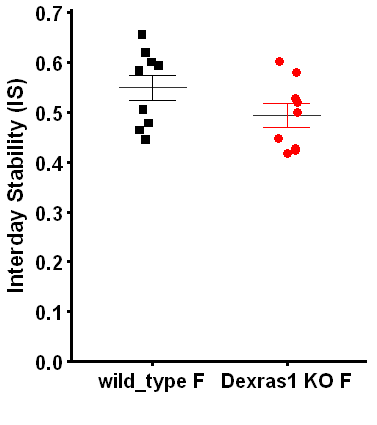

In [23]:
#t-test Interday Stability - Females
t.test(Inter_Day_Stability$interday_stability[Inter_Day_Stability$Sex=="Female"]~Inter_Day_Stability$Animal_Type[Inter_Day_Stability$Sex=="Female"], var.equal=TRUE)
#Plot Interday Stability - Females
options(repr.plot.width=8/2.54, repr.plot.height=9/2.54)
Inter_Day_Stability_Figure(Inter_Day_Stability%>%filter(Sex=="Female"),c("wild_type F","Dexras1 KO F") )
ggsave("Plots/InterDayStability_Plot_F.png",width=8, height=9,units = "cm")

## <center> Intraday Variability Calculation and Figures

We can also calculate Intraday variability:

Intraday Variability = $\frac{n\sum_{i=2}^n(x_i-x_{i-1})^2}{(n-1)\sum_{i=1}^n(x_i-\bar{x})^2}$

where $n$ is the total number of data, $p$ the number of data per day, $\bar{x_m}$ the means per minute over the 7 days, $\bar{x}$ the mean of all data, and $x_i$ the individual data points.

In [24]:
  #Intra-Day Variability from PIR Activity Data
Numerator_Intra <-Activity_Intra_Inter%>%arrange(desc(Animal_ID))%>% #arrange in descending order of Animal_ID to subtract from the same animal (except for the first subtraction of each animal, which will be accounted in the for-loop below e.g. datapoint 10081)
  mutate(to_subtract=c(NA,Activity[-length(Activity)]))%>% #create column of previous data points (i-1)
    mutate(to_sum=(Activity-to_subtract)^2) #subtract individual data points (i) and previous data points (i-1) and square these into to_sum column
to_sum1 <- Numerator_Intra$to_sum # define the difference squared (to_sum) as to_sum1, which will be used in for-loop to remove any difference squared values that come from different animals (first subtraction of each animal e.g. datapoint 10081)
 for (i in 2:nrow(Numerator_Intra)){  #to all rows except the very first, which does not have a previous value to query
   to_sum1[i]<- ifelse(Numerator_Intra$Animal_ID[i-1]==Numerator_Intra$Animal_ID[i],  #If difference squared comes from the same animal
         to_sum1[i], NA) #then keep to_sum1 value; otherwise, append the value to NA
 }

  Numerator_Intra<-Numerator_Intra%>%mutate(to_sum=to_sum1)%>%na.omit()%>% # replace to_sum column with to_sum1 and remove any rows with NA values (first difference squared of animals)
    group_by(Animal_ID, Animal_Type, Sex)%>%summarize(Numerator=(nrow(Activity_Intra_Inter)/36)*sum(to_sum)) # number of rows divide by 36 to get total data per animal multiplied by the sum of to_sum

Denominator_Intra <- Activity_Intra_Inter%>%group_by(Animal_ID)%>%
  mutate(grand_mean=mean(Activity))%>%#mean of all data
  ungroup()%>%mutate(denominator=(Activity-grand_mean)^2)%>%group_by(Animal_ID)%>% #subtract individual data points and mean of all data, and square these
  summarize(denominator=((nrow(Activity_Intra_Inter)/36)-1)*sum(denominator)) #divide by 36 to get total data per animal and subtract 1

Intra_Day_Variability <- left_join(Numerator_Intra, Denominator_Intra, by="Animal_ID")%>% 
  mutate(intraday_variability=Numerator/denominator) #Intraday variability is the quotient of Numerator and denominator
head(Intra_Day_Variability)

`summarise()` has grouped output by 'Animal_ID', 'Animal_Type'. You can override using the `.groups` argument.


Animal_ID,Animal_Type,Sex,Numerator,denominator,intraday_variability
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
C57_Female_1,C57,Female,17985753632,110548745774,0.1626952
C57_Female_2,C57,Female,21199412248,65754981181,0.3224001
C57_Female_3,C57,Female,20053891906,53048342752,0.3780305
C57_Female_4,C57,Female,18963761488,87348427400,0.2171048
C57_Female_5,C57,Female,23399706736,72984463879,0.3206122
C57_Female_6,C57,Female,18713363368,102978965912,0.1817202


We will produce a graphing function to make plotting males and females easily:

In [25]:
Intra_Day_Variability_Figure <- function(Data, label1){
Data %>%group_by(Animal_Type)%>%
  summarize(mean=mean(intraday_variability), sd=std.error(intraday_variability))%>%
  ggplot(aes(x=Animal_Type, y=mean))+
  geom_boxplot(width=.5,position=position_dodge(.05), lwd=.25)+
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd, color=Animal_Type), width=.35)+
  geom_jitter(data=Data%>%
                group_by(Animal_Type), aes(x=Animal_Type, y=intraday_variability, 
                                           color=Animal_Type, shape=Animal_Type), size=2.1, 
              position=position_jitter(w = 0.1, h = 0))+
  scale_y_continuous(breaks=c(0,.1,.2,.3,.4,.5),expand=expansion(mult=c(0,0.01)),limits = c(0,.5))+
  labs(x="",y="Intraday Variability (IV)")+
  theme_bw()+
  theme(legend.text=element_text(size=13),axis.text=element_text(size=12, color="black", face="bold"),
        axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5),
        axis.title.y=element_text(vjust=+1.8),
        axis.title=element_text(size=13, face="bold"),
        axis.ticks= element_line(size=1, color="black"),
        axis.line = element_line(size=1),
        axis.title.x=element_text(vjust=-0.5),
        panel.border = element_blank(),
        panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        legend.title=element_blank(),
        legend.position="none")+
  scale_color_manual(values=c("black", "red"), labels=label1)+
  scale_shape_manual(values=c("square", "circle"), labels=label1)+
  scale_x_discrete(labels=label1)
}



	Two Sample t-test

data:  Intra_Day_Variability$intraday_variability by Intra_Day_Variability$Animal_Type
t = -3.0452, df = 34, p-value = 0.004469
alternative hypothesis: true difference in means between group C57 and group Dexras1KO is not equal to 0
95 percent confidence interval:
 -0.12557813 -0.02505342
sample estimates:
      mean in group C57 mean in group Dexras1KO 
              0.3188040               0.3941197 


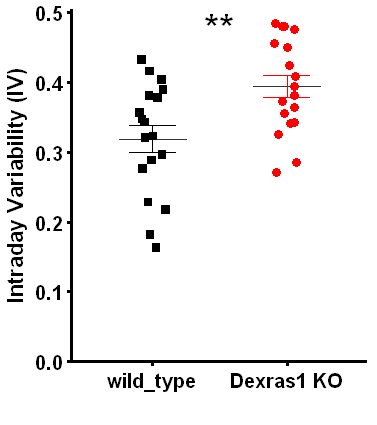

In [26]:
#t-test Intraday Variability - Both sexes
t.test(Intra_Day_Variability$intraday_variability~Intra_Day_Variability$Animal_Type, var.equal=TRUE)
#Plot Intraday Variability - Both sexes
options(repr.plot.width=8/2.54, repr.plot.height=9/2.54)
Intra_Day_Variability_Figure(Intra_Day_Variability,c("wild_type", "Dexras1 KO"))+
  annotate("text",x=1.5, y=.48, label="**", angle=0, size=8)
ggsave("Plots/IntraDayVariability_Plot.png",width=8, height=9,units = "cm")


	Two Sample t-test

data:  Intra_Day_Variability$intraday_variability[Intra_Day_Variability$Sex == "Male"] by Intra_Day_Variability$Animal_Type[Intra_Day_Variability$Sex == "Male"]
t = -0.95093, df = 16, p-value = 0.3558
alternative hypothesis: true difference in means between group C57 and group Dexras1KO is not equal to 0
95 percent confidence interval:
 -0.0715762  0.0272469
sample estimates:
      mean in group C57 mean in group Dexras1KO 
              0.3624770               0.3846416 


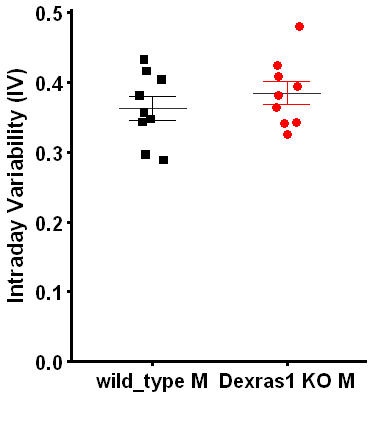

In [27]:
#t-test Intraday Variability - Males
t.test(Intra_Day_Variability$intraday_variability[Intra_Day_Variability$Sex=="Male"]~Intra_Day_Variability$Animal_Type[Intra_Day_Variability$Sex=="Male"], var.equal=TRUE)
#Plot Intraday Variability - Males
options(repr.plot.width=8/2.54, repr.plot.height=9/2.54)
Intra_Day_Variability_Figure(Intra_Day_Variability%>%filter(Sex=="Male"),c("wild_type M", "Dexras1 KO M"))
ggsave("Plots/IntraDayVariability_Plot_M.png",width=8, height=9,units = "cm")


	Two Sample t-test

data:  Intra_Day_Variability$intraday_variability[Intra_Day_Variability$Sex == "Female"] by Intra_Day_Variability$Animal_Type[Intra_Day_Variability$Sex == "Female"]
t = -3.2556, df = 16, p-value = 0.004962
alternative hypothesis: true difference in means between group C57 and group Dexras1KO is not equal to 0
95 percent confidence interval:
 -0.21211926 -0.04481455
sample estimates:
      mean in group C57 mean in group Dexras1KO 
              0.2751310               0.4035979 


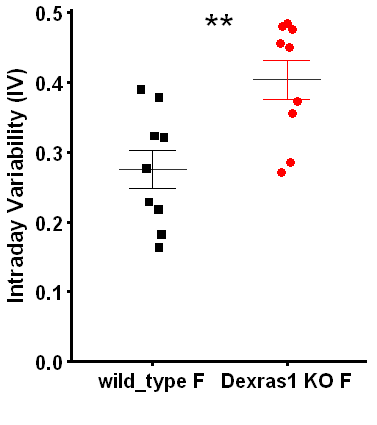

In [28]:
#t-test Intraday Variability - Females
t.test(Intra_Day_Variability$intraday_variability[Intra_Day_Variability$Sex=="Female"]~Intra_Day_Variability$Animal_Type[Intra_Day_Variability$Sex=="Female"], var.equal=TRUE)
#Plot Intraday Variability - Females
options(repr.plot.width=8/2.54, repr.plot.height=9/2.54)
Intra_Day_Variability_Figure(Intra_Day_Variability%>%filter(Sex=="Female"),c("wild_type F", "Dexras1 KO F"))+
  annotate("text",x=1.5, y=.48, label="**", angle=0, size=8)
ggsave("Plots/IntraDayVariability_Plot_F.png",width=8, height=9,units = "cm")

# <center> Baseline Activity by the Hour

In terms of activity differences between Dexras1 KO and C57 wild-type mice, we can also ask if there is a difference in the mean activity per hour. Recall there were six mice per cohort (each having a PIR), with a total of six cohorts. The Tickling files all contain the same information, except their dates are relativized to the first cohort. We will define a dataframe (called Activity) which takes the mean activity per animal per hour, with data filtered by dates to only include baseline data:

In [29]:
Activity <- cbind(Tickling%>%
                                                filter(ymd_hms(start_hour)>=ymd_hms("2022-06-18T09:00:00") & 
                                                         ymd_hms(start_hour)<ymd_hms("2022-06-25T09:00:00"))%>% # filter for baseline data only
                                                group_by(start_hour)%>%summarize_at(2:7, mean)%>% # take the means of 10-second interval that fall within a given hour
                                                transmute(start_hour, C57_Male_1=PIR1, 
                                                          Dexras1KO_Male_1=PIR2,
                                                          C57_Male_2=PIR3, 
                                                          Dexras1KO_Male_2=PIR4,
                                                          C57_Male_3=PIR5, 
                                                          Dexras1KO_Male_3=PIR6), 
                                              Tickling1%>% filter(ymd_hms(start_hour)>=ymd_hms("2022-06-18T09:00:00") & 
                                                                    ymd_hms(start_hour)<ymd_hms("2022-06-25T09:00:00"))%>%
                                                group_by(start_hour)%>%summarize_at(2:7, mean)%>%
                                                transmute(start_hour, C57_Male_4=PIR1, 
                                                          Dexras1KO_Male_4=PIR2,
                                                          C57_Male_5=PIR3, 
                                                          Dexras1KO_Male_5=PIR4,
                                                          C57_Male_6=PIR5, 
                                                          Dexras1KO_Male_6=PIR6),
                                              Tickling2%>% filter(ymd_hms(start_hour)>=ymd_hms("2022-06-18T09:00:00") & 
                                                                    ymd_hms(start_hour)<ymd_hms("2022-06-25T09:00:00"))%>%
                                                group_by(start_hour)%>%summarize_at(2:7, mean)%>%
                                                transmute(start_hour, C57_Female_1=PIR1, 
                                                          Dexras1KO_Female_1=PIR2,
                                                          C57_Female_2=PIR3, 
                                                          Dexras1KO_Female_2=PIR4,
                                                          C57_Female_3=PIR5, 
                                                          Dexras1KO_Female_3=PIR6),
                                              Tickling3%>% filter(ymd_hms(start_hour)>=ymd_hms("2022-06-18T09:00:00") & 
                                                                     ymd_hms(start_hour)<ymd_hms("2022-06-25T09:00:00"))%>%
                                                 group_by(start_hour)%>%summarize_at(2:7, mean)%>%
                                                  transmute(start_hour, C57_Female_4=PIR1, 
                                              Dexras1KO_Female_4=PIR2,
                                              C57_Female_5=PIR3, 
                                              Dexras1KO_Female_5=PIR4,
                                              C57_Female_6=PIR5, 
                                              Dexras1KO_Female_6=PIR6),
                      Tickling4%>% filter(ymd_hms(start_hour)>=ymd_hms("2022-06-18T09:00:00") & 
                                            ymd_hms(start_hour)<ymd_hms("2022-06-25T09:00:00"))%>%
                        group_by(start_hour)%>%summarize_at(2:7, mean)%>%
                        transmute(start_hour, C57_Male_7=PIR1, 
                                  Dexras1KO_Male_7=PIR2,
                                  C57_Male_8=PIR3, 
                                  Dexras1KO_Male_8=PIR4,
                                  C57_Male_9=PIR5, 
                                  Dexras1KO_Male_9=PIR6),
                      Tickling5%>% filter(ymd_hms(start_hour)>=ymd_hms("2022-06-18T09:00:00") & 
                                            ymd_hms(start_hour)<ymd_hms("2022-06-25T09:00:00"))%>%
                        group_by(start_hour)%>%summarize_at(2:7, mean)%>%
                        transmute(start_hour, C57_Female_7=PIR1, 
                                  Dexras1KO_Female_7=PIR2,
                                  C57_Female_8=PIR3, 
                                  Dexras1KO_Female_8=PIR4,
                                  C57_Female_9=PIR5, 
                                  Dexras1KO_Female_9=PIR6)
                      )%>%
  pivot_longer(cols=c(2:37), names_to="Animal", values_to="Activity")%>% #pivot to longer format for plotting and statistics
  mutate(Animal_ID=Animal)%>%
  separate(col="Animal", into=c("Animal_Type", "Sex", "Number"), sep = "_")%>%
  ungroup()%>%
      mutate(start_hour=ymd_hms(start_hour)-hours(9))%>%
      group_by(hour=hour(start_hour), Animal_Type, Sex, Number, Animal_ID)%>%
      summarize(Activity1=mean(Activity))%>%ungroup()

head(Activity)

`summarise()` has grouped output by 'hour', 'Animal_Type', 'Sex', 'Number'. You can override using the `.groups` argument.


hour,Animal_Type,Sex,Number,Animal_ID,Activity1
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
0,C57,Female,1,C57_Female_1,46.42076
0,C57,Female,2,C57_Female_2,36.25750
0,C57,Female,3,C57_Female_3,38.98377
0,C57,Female,4,C57_Female_4,35.05311
0,C57,Female,5,C57_Female_5,19.94203
0,C57,Female,6,C57_Female_6,44.20103


## <center> Baseline Hourly Activity - Line Graphs

In [30]:
Activity_Day_Figure <- function(Data, label1){
    Data%>%group_by(hour, Animal_Type)%>%
      summarize(mean=mean(Activity1), sd=std.error(Activity1))%>%
      ggplot(aes(x=hour, y=mean))+
      coord_cartesian(xlim = c(0, 23), clip = "off")+
      annotate("rect", xmin=12, xmax=24, ymin=-Inf, ymax=Inf, fill="#ECECEC")+
      labs(x="ZT", y="% Activity (mean of hour)")+
      geom_line(size=1.1,aes(color=Animal_Type))+
      geom_point(aes(color=Animal_Type, shape=Animal_Type), size=3)+
      scale_y_continuous(expand=expansion(mult=c(0,0.01)),limits = c(0,60))+
      geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd, color=Animal_Type),width=.2)+
      theme_bw()+
      theme(legend.text=element_text(size=13),axis.text=element_text(size=26, color="black", face="bold"),
            axis.text.x = element_text(angle = 0, vjust = 0.5, hjust=0.5),
            axis.title.y=element_text(vjust=+1.8),
            axis.title=element_text(size=26, face="bold"),
            axis.ticks= element_line(size=1, color="black"),
            axis.line = element_line(size=1),
            axis.title.x=element_text(vjust=-0.5),
            panel.border = element_blank(),
            panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
            legend.title=element_blank())+
            #legend.position="none")+
      scale_x_continuous(breaks=c(0,4,8,12,16,20))+
      scale_color_manual(values=c("black", "red"), labels=label1)+
      scale_shape_manual(values=c("square", "circle"), labels=label1)
    }
    

Warning message:
"Converting "Animal_ID" to factor for ANOVA."
Warning message:
"Converting "Animal_Type" to factor for ANOVA."


$ANOVA
            Effect DFn DFd          F             p p<.05        ges
2      Animal_Type   1  34   5.025426  3.161274e-02     * 0.05058427
3             hour  23 782 121.954944 2.730333e-240     * 0.69641298
4 Animal_Type:hour  23 782   3.526509  6.200418e-08     * 0.06220660

$`Mauchly's Test for Sphericity`
            Effect            W             p p<.05
3             hour 3.015531e-20 8.979514e-110     *
4 Animal_Type:hour 3.015531e-20 8.979514e-110     *

$`Sphericity Corrections`
            Effect       GGe        p[GG] p[GG]<.05       HFe        p[HF]
3             hour 0.1254014 2.094527e-32         * 0.1382609 1.786718e-35
4 Animal_Type:hour 0.1254014 1.905408e-02         * 0.1382609 1.559536e-02
  p[HF]<.05
3         *
4         *

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed

,hour,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,0,Animal_Type,1,34,8.064,0.008,*,0.192,0.03840000
2,1,Animal_Type,1,34,8.928,0.005,*,0.208,0.03000000
3,2,Animal_Type,1,34,4.834,0.035,*,0.124,0.07000000
4,3,Animal_Type,1,34,4.105,0.051,,0.108,0.08550000
5,4,Animal_Type,1,34,12.502,0.001,*,0.269,0.02400000
6,5,Animal_Type,1,34,10.248,0.003,*,0.232,0.02400000
7,6,Animal_Type,1,34,11.505,0.002,*,0.253,0.02400000
8,7,Animal_Type,1,34,2.962,0.094,,0.080,0.13270588
9,8,Animal_Type,1,34,7.143,0.011,*,0.174,0.04400000


`summarise()` has grouped output by 'hour'. You can override using the `.groups` argument.


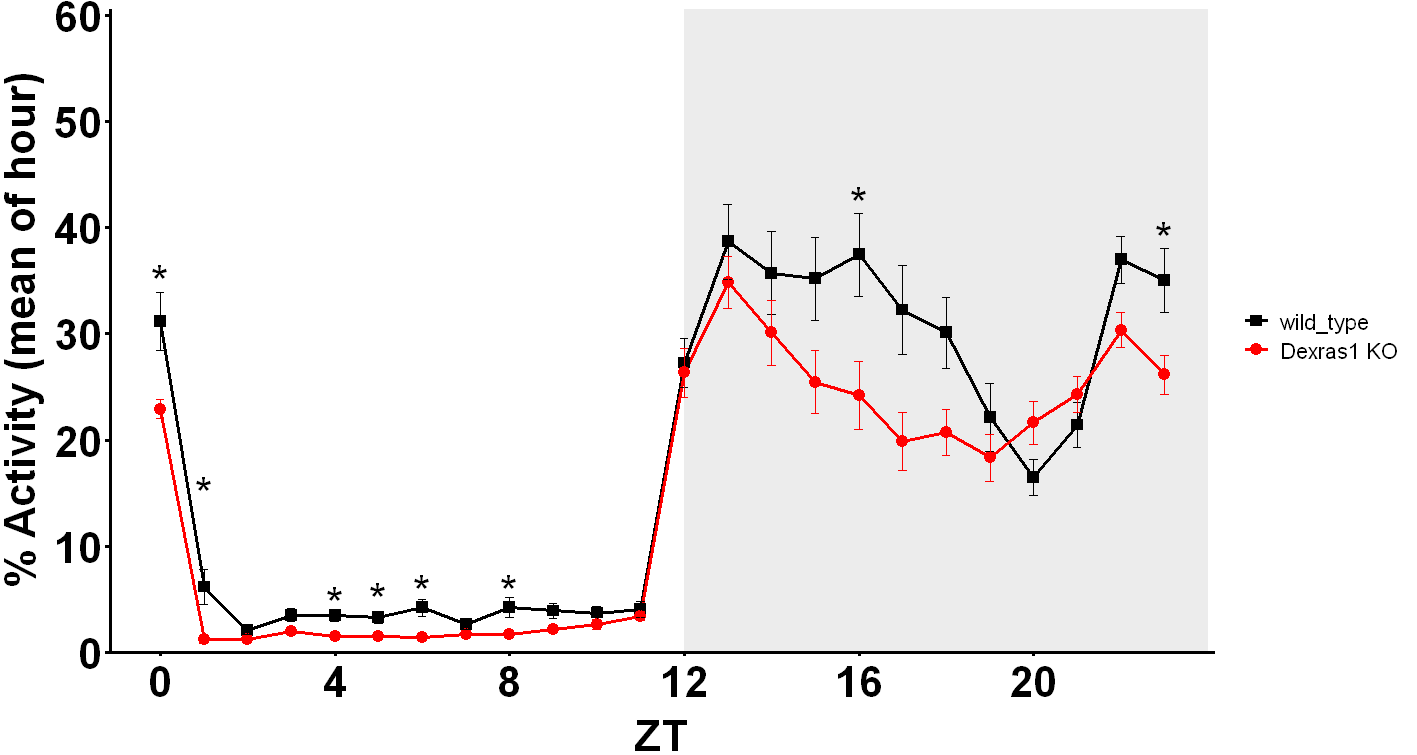

In [31]:
#Split-Plot ANOVA - Hourly Activity - Both Sexes
ezANOVA(Activity%>%mutate(hour=as.factor(hour)), dv=.(Activity1), wid=.(Animal_ID), within=.(hour), between=.(Animal_Type))
#Post-hoc tests - Hourly Activity - Both Sexes
p_adjust_activity <- Activity%>%group_by(hour)%>%
      anova_test(dv = Activity1, wid = Animal_ID, between = Animal_Type) %>%
      get_anova_table() %>%
      adjust_pvalue(method = "BH")
p_adjust_activity
#Plot - Hourly Activity - Both Sexes
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54)
    Activity_Day_Figure(Activity,c("wild_type","Dexras1 KO") )+
      annotate("text",x=0, y=35, label="*", angle=0, size=10)+
      annotate("text",x=1, y=15, label="*", angle=0, size=10)+
      annotate("text",x=4, y=4.7, label="*", angle=0, size=10)+
      annotate("text",x=5, y=5, label="*", angle=0, size=10)+
      annotate("text",x=6, y=5.8, label="*", angle=0, size=10)+
      annotate("text",x=8, y=5.8, label="*", angle=0, size=10)+
      annotate("text",x=16, y=42.3, label="*", angle=0, size=10)+
    annotate("text",x=23, y=39, label="*", angle=0, size=10)
    ggsave("Plots/Activity_Line_Plot.png",width=30, height=16,units = "cm")

Warning message:
"Converting "Animal_ID" to factor for ANOVA."
Warning message:
"Converting "Animal_Type" to factor for ANOVA."


,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Animal_Type,1,16,2.082464,1.682920e-01,,0.03949633
2,hour,23,368,71.017180,3.931943e-120,*,0.75224620
3,Animal_Type:hour,23,368,1.791688,1.475019e-02,*,0.07115143


Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed

,hour,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,0,Animal_Type,1,16,2.451,0.137,,0.133000,0.3288000
2,1,Animal_Type,1,16,7.262,0.016,*,0.312000,0.1920000
3,2,Animal_Type,1,16,0.797,0.385,,0.047000,0.4400000
4,3,Animal_Type,1,16,3.501,0.080,,0.180000,0.3200000
5,4,Animal_Type,1,16,10.805,0.005,*,0.403000,0.1200000
6,5,Animal_Type,1,16,2.707,0.119,,0.145000,0.3288000
7,6,Animal_Type,1,16,4.575,0.048,*,0.222000,0.2304000
8,7,Animal_Type,1,16,2.703,0.120,,0.145000,0.3288000
9,8,Animal_Type,1,16,2.463,0.136,,0.133000,0.3288000


`summarise()` has grouped output by 'hour'. You can override using the `.groups` argument.


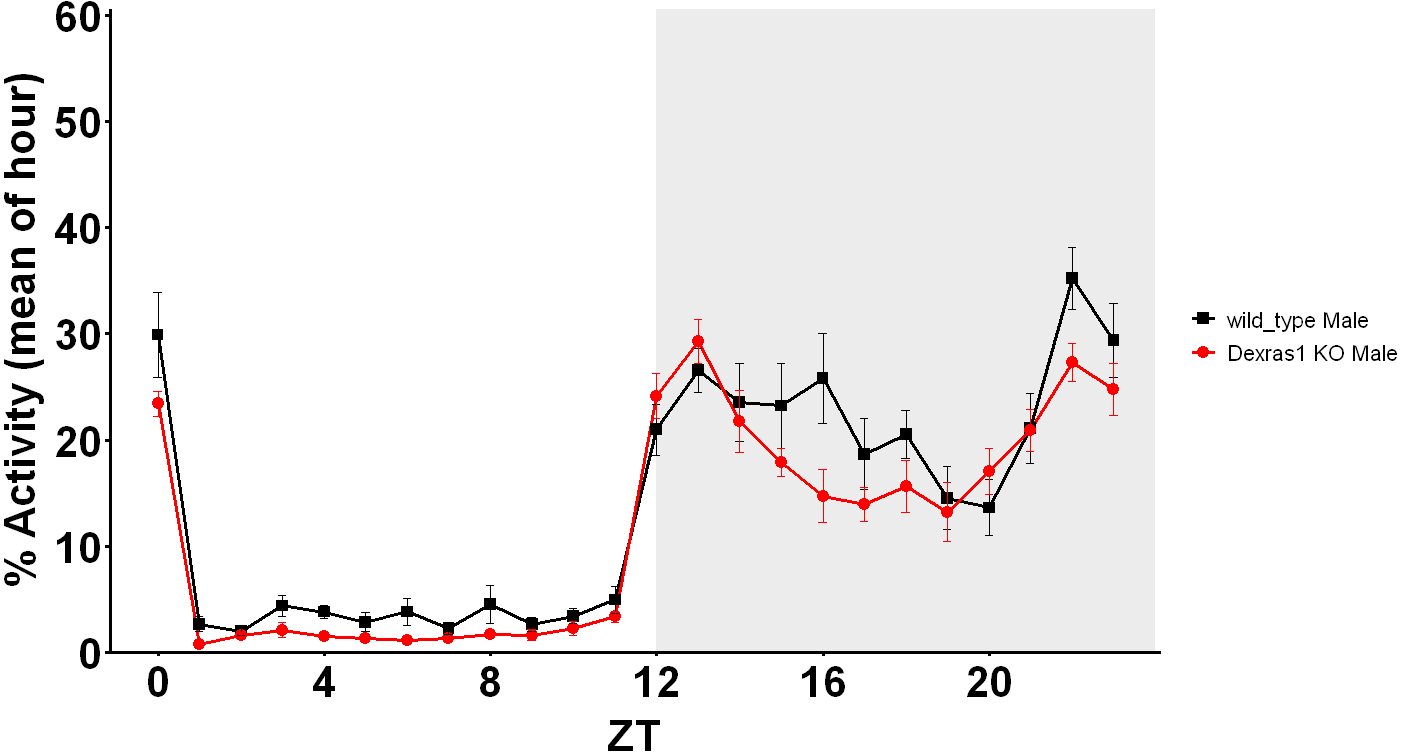

In [32]:
#Split-Plot ANOVA - Hourly Activity - Males
ezANOVA(Activity%>%mutate(hour=as.factor(hour))%>%filter(Sex=="Male"), dv=.(Activity1), wid=.(Animal_ID), within=.(hour), between=.(Animal_Type), type=1)
#Post-hoc tests - Hourly Activity - Males   
    p_adjust_activity_male <- Activity%>%filter(Sex=="Male")%>%group_by(hour)%>%
      anova_test(dv = Activity1, wid = Animal_ID, between = Animal_Type) %>%
      get_anova_table() %>%
      adjust_pvalue(method = "BH")
    p_adjust_activity_male
#Plot - Hourly Activity - Males
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54)
    Activity_Day_Figure(Activity%>%filter(Sex=="Male"),c("wild_type Male","Dexras1 KO Male") )
    ggsave("Plots/Activity_Line_Plot_M.png",width=30, height=16,units = "cm")

Warning message:
"Converting "Animal_ID" to factor for ANOVA."
Warning message:
"Converting "Animal_Type" to factor for ANOVA."


,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Animal_Type,1,16,6.906274,1.827105e-02,*,0.1224940
2,hour,23,368,113.086569,2.516701e-151,*,0.8270538
3,Animal_Type:hour,23,368,4.594342,8.422076e-11,*,0.1626776


Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed

,hour,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,0,Animal_Type,1,16,5.500,0.032,*,0.256,0.0768000
2,1,Animal_Type,1,16,7.920,0.012,*,0.331,0.0576000
3,2,Animal_Type,1,16,4.188,0.058,,0.207,0.1070769
4,3,Animal_Type,1,16,0.785,0.389,,0.047,0.4243636
5,4,Animal_Type,1,16,3.370,0.085,,0.174,0.1350000
6,5,Animal_Type,1,16,9.882,0.006,*,0.382,0.0480000
7,6,Animal_Type,1,16,6.755,0.019,*,0.297,0.0630000
8,7,Animal_Type,1,16,1.011,0.330,,0.059,0.3771429
9,8,Animal_Type,1,16,11.421,0.004,*,0.417,0.0480000


`summarise()` has grouped output by 'hour'. You can override using the `.groups` argument.


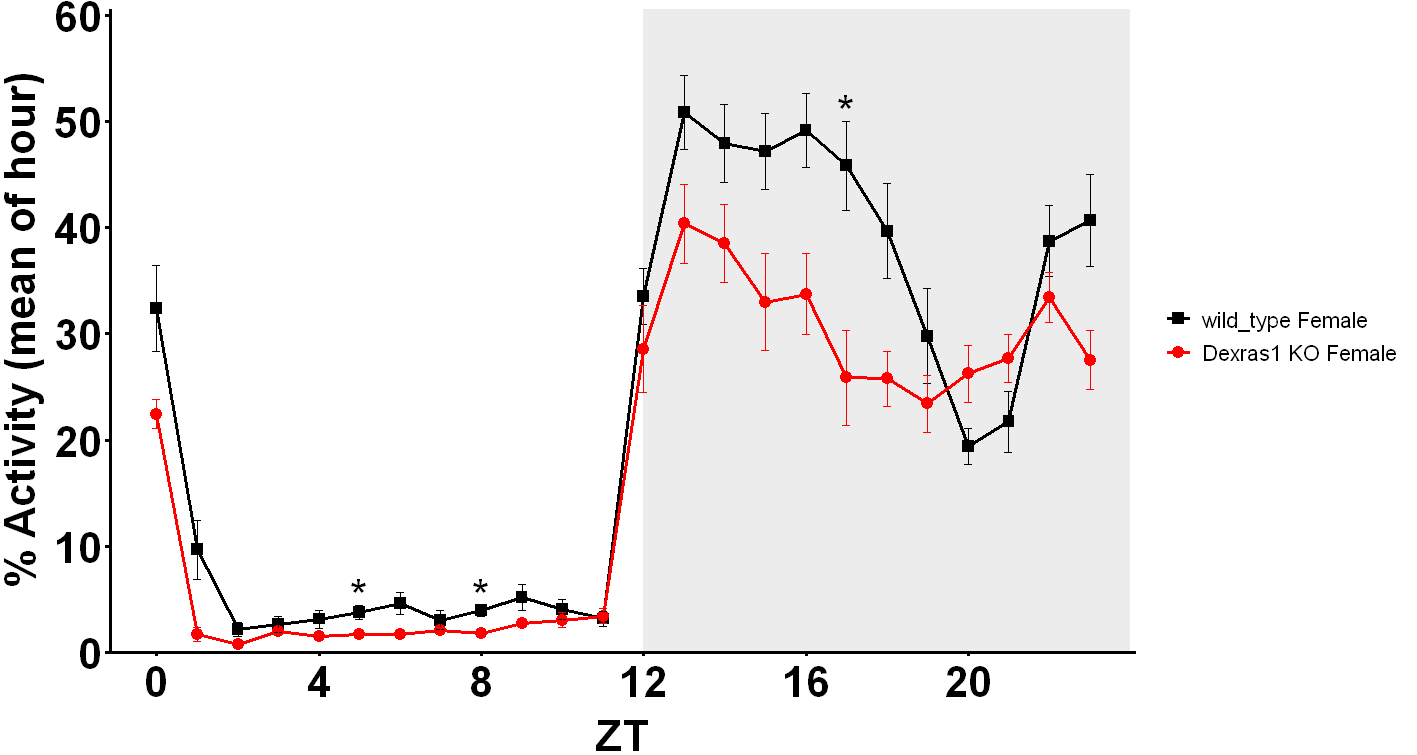

In [33]:
#Split-Plot ANOVA - Hourly Activity - Females
ezANOVA(Activity%>%mutate(hour=as.factor(hour))%>%filter(Sex=="Female"), dv=.(Activity1), wid=.(Animal_ID), within=.(hour), between=.(Animal_Type), type=1)
#Post-hoc-tests - Hourly Activity - Females   
p_adjust_activity_female <- Activity%>%filter(Sex=="Female")%>%group_by(hour)%>%
      anova_test(dv = Activity1, wid = Animal_ID, between = Animal_Type) %>%
      get_anova_table() %>%
      adjust_pvalue(method = "BH")
p_adjust_activity_female
#Plot - Hourly Activity - Females
options(repr.plot.width=30/2.54, repr.plot.height=16/2.54)
    Activity_Day_Figure(Activity%>%filter(Sex=="Female"),c("wild_type Female","Dexras1 KO Female") )+
      annotate("text",x=5, y=5.4, label="*", angle=0, size=10)+
      annotate("text",x=8, y=5.4, label="*", angle=0, size=10)+
      annotate("text",x=17, y=51, label="*", angle=0, size=10)
    ggsave("Plots/Activity_Line_Plot_F.png",width=30, height=16,units = "cm")